## Sign Language Image Classification using Deep Learning

This project implemented different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. 

The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (**excluding J and Z which require motion**). The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and **no cases for 9=J or 25=Z because of gesture motions**). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, $pixel_{1}$,$pixel_{2}$….$pixel_{784}$ which represent a single 28x28 pixel image with grayscale values between 0-255.

The trainad models' **h5 files** and their training histories are also included.
    * best_dnn_bn_model.h5
    * best_dnn_bn_perf_model.h5
    * best_dnn_selu_model.h5
    * best_mobilenet_model.h5
    * history1
    * history2
    * history1_perf
    * historymb


In [2]:
# import the necessary libraries (TensorFlow, sklearn NumPy, Pandas, and Matplotlib)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

### Data Preprocessing

In [3]:
# Load the dataset using Pandas from the CSV file
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

print(train_df.shape)
print(test_df.shape)

(27455, 785)
(7172, 785)


In [4]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.325369,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.374907,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,200.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [5]:
test_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
# Drop unreasonble row
train_df = train_df.drop(train_df[train_df['label'] == 200].index)

# Separate labels and pixel values in training and testing sets
train_labels = train_df.iloc[:,0].values
test_labels = test_df.iloc[:,0].values.copy()
train_images = (train_df.iloc[:,1:]/255).values
test_images = (test_df.iloc[:,1:]/255).values

# Shift the labels in order to ensure 24 classes in train and test labels
for n in range(len(train_labels)):
    if train_labels[n]>8:
        train_labels[n] = train_labels[n] - 1
for n in range(len(test_labels)):
    if test_labels[n]>8:
        test_labels[n] = test_labels[n] - 1
        
print('Updated Training Labels: ', np.unique(train_labels))
print('Updated Testing Labels: ', np.unique(test_labels))


Updated Training Labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Updated Testing Labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [7]:
# Convert labels to one-hot encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
train_labels_encoded = encoder.fit_transform(train_labels.reshape(-1, 1)).toarray()
test_labels_encoded = encoder.transform(test_labels.reshape(-1, 1)).toarray()

print("Training Labels:\n", train_labels_encoded)
print("Test Labels:\n", test_labels_encoded)


Training Labels:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test Labels:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


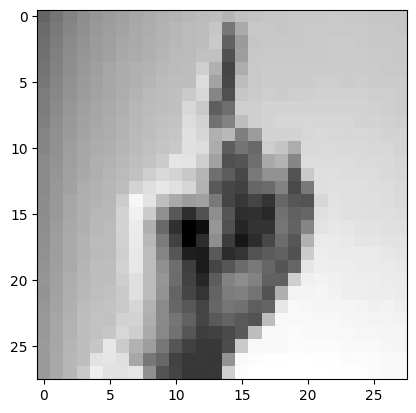

In [8]:
# Plot a sample image to check
train_images_reshaped = tf.reshape(train_images,shape=[-1,28,28])
plt.imshow(train_images_reshaped[0,:, :], cmap='gray')
plt.grid(False)
plt.show()


### Model training

#### Model 1: Sequential model with Batch Normalization

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.activations import swish
from tensorflow.keras.layers import InputLayer, AlphaDropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import Activation

model1 = keras.models.Sequential()

# Add the dense layers with batch normalization and Swish activation
for n in range(20):
    model1.add(BatchNormalization())
    model1.add(Dense(100, kernel_initializer=HeNormal()))
    model1.add(Activation('swish'))

# Add the output layer
model1.add(Dense(24, activation='softmax'))  

# Compile first model
model1.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Model 2: Sequential model with SELU and self-normalization

In [11]:
# Model 2: with SELU and self-normalization
from tensorflow.keras.initializers import lecun_normal
model2 = keras.models.Sequential()

# Add the dense layers
for n in range(20):
    model2.add(Dense(100, activation='selu', kernel_initializer=lecun_normal()))
    if n % 10 == 0:
        model2.add(AlphaDropout(0.1))
    
# Output layer
model2.add(Dense(24, activation='softmax'))

# Compile second model
model2.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the train_images and transform the data
train_images_scaled = scaler.fit_transform(train_images)

# Transform the test_images using the scaler fitted on train_images
test_images_scaled = scaler.transform(test_images)


In [15]:
import pickle
from tensorflow.keras.callbacks import ModelCheckpoint

history1, history2 = None, None
 
# We go to set a seed to get the same results every run
np.random.seed(42)
tf.random.set_seed(42)

checkpoint_path_bn = "best_dnn_bn_model.h5"
checkpoint_path_selu = "best_dnn_selu_model.h5"

# Set up early stopping
early_stopping =keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True) 

# Define model checkpoint callback
model1_checkpoint_cb = ModelCheckpoint(
    checkpoint_path_bn, 
    monitor='val_accuracy', 
    save_best_only=True, 
    save_weights_only=False, 
    mode='max', 
    verbose=1
)

# Train model 1 
history1 = model1.fit(train_images_scaled, train_labels_encoded, 
                 validation_data=(test_images_scaled, test_labels_encoded), 
                 epochs=100, batch_size=32,
                 callbacks=[model1_checkpoint_cb, early_stopping])



Epoch 1/100
856/858 [============================>.] - ETA: 0s - loss: 2.5712 - accuracy: 0.2170
Epoch 1: val_accuracy improved from -inf to 0.37381, saving model to best_dnn_bn_model.h5
858/858 [==============================] - 20s 13ms/step - loss: 2.5697 - accuracy: 0.2173 - val_loss: 1.9718 - val_accuracy: 0.3738
Epoch 2/100
858/858 [==============================] - ETA: 0s - loss: 1.4240 - accuracy: 0.5372
Epoch 2: val_accuracy improved from 0.37381 to 0.61196, saving model to best_dnn_bn_model.h5
858/858 [==============================] - 9s 10ms/step - loss: 1.4240 - accuracy: 0.5372 - val_loss: 1.2509 - val_accuracy: 0.6120
Epoch 3/100
854/858 [============================>.] - ETA: 0s - loss: 0.8999 - accuracy: 0.7183
Epoch 3: val_accuracy improved from 0.61196 to 0.71417, saving model to best_dnn_bn_model.h5
858/858 [==============================] - 9s 10ms/step - loss: 0.8989 - accuracy: 0.7188 - val_loss: 1.0186 - val_accuracy: 0.7142
Epoch 4/100
855/858 [===============

In [17]:
# Model 2's checkpoint
model2_checkpoint_cb = ModelCheckpoint(
    checkpoint_path_selu, 
    monitor='val_accuracy', 
    save_best_only=True, 
    save_weights_only=False, 
    mode='max', 
    verbose=1
)

# Train model 2 
history2 = model2.fit(train_images, train_labels_encoded, 
                 validation_data=(test_images, test_labels_encoded), 
                 epochs=100, batch_size=32,
                 callbacks=[model2_checkpoint_cb, early_stopping])

# The following code will save your history - don't change it.
if 'history1' in globals():  
    with open('./history1', 'wb') as file_pi:
        pickle.dump(history1.history, file_pi)
if 'history2' in globals():  
    with open('./history2', 'wb') as file_pi:
        pickle.dump(history2.history, file_pi)

Epoch 1/100
847/858 [============================>.] - ETA: 0s - loss: 3.1727 - accuracy: 0.0638
Epoch 1: val_accuracy improved from -inf to 0.09230, saving model to best_dnn_selu_model.h5
858/858 [==============================] - 7s 6ms/step - loss: 3.1697 - accuracy: 0.0641 - val_loss: 3.0511 - val_accuracy: 0.0923
Epoch 2/100
848/858 [============================>.] - ETA: 0s - loss: 2.6391 - accuracy: 0.1452
Epoch 2: val_accuracy improved from 0.09230 to 0.18516, saving model to best_dnn_selu_model.h5
858/858 [==============================] - 4s 5ms/step - loss: 2.6371 - accuracy: 0.1454 - val_loss: 2.3680 - val_accuracy: 0.1852
Epoch 3/100
852/858 [============================>.] - ETA: 0s - loss: 2.2377 - accuracy: 0.2249
Epoch 3: val_accuracy improved from 0.18516 to 0.23118, saving model to best_dnn_selu_model.h5
858/858 [==============================] - 5s 6ms/step - loss: 2.2375 - accuracy: 0.2248 - val_loss: 2.2451 - val_accuracy: 0.2312
Epoch 4/100
857/858 [=============

In [18]:
# Define the file name for the saved model
model1_name = "best_dnn_bn_model.h5"
# Load the model
model1 = keras.models.load_model(model1_name)
# Define the file name for the saved model
model2_name = "best_dnn_selu_model.h5"
# Load the model
model2 = keras.models.load_model(model2_name)

# Evaluate the models on the test set
test_loss1, test_acc1 = model1.evaluate(test_images_scaled, test_labels_encoded)
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels_encoded)
print(f"Model 1| Test accuracy: {test_acc1:.4f}, Test loss: {test_loss1:.4f}")
print(f"Model 2| Test accuracy: {test_acc2:.4f}, Test loss: {test_loss2:.4f}")


225/225 [==============================] - 1s 2ms/step - loss: 1.5023 - accuracy: 0.5810
Model 1| Test accuracy: 0.8235, Test loss: 0.9247
Model 2| Test accuracy: 0.5810, Test loss: 1.5023


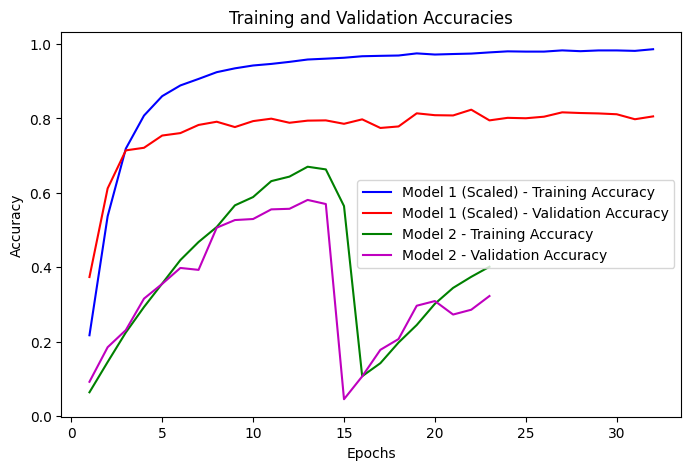

In [19]:
# Load history for model 1 
history_name1 = "./history1"
with open(history_name1, "rb") as file_pi:
    loaded_history1 = pickle.load(file_pi)
    
# Load history for model 2 
history_name2 = "./history2"
with open(history_name2, "rb") as file_pi:
    loaded_history2 = pickle.load(file_pi)

# Plot the training and validation accuracies during training for both models
# Get the training and validation accuracies for model1_scaled
train_acc1_scaled = loaded_history1['accuracy']
val_acc1_scaled = loaded_history1['val_accuracy']

# Get the training and validation accuracies for model2
train_acc2 = loaded_history2['accuracy']
val_acc2 = loaded_history2['val_accuracy']

# Plot the training and validation accuracies for both models
epochs_model1 = range(1, len(train_acc1_scaled) + 1)
epochs_model2 = range(1, len(train_acc2) + 1)
plt.figure(figsize=(8,5))
plt.plot(epochs_model1, train_acc1_scaled, 'b', label='Model 1 (Scaled) - Training Accuracy')
plt.plot(epochs_model1, val_acc1_scaled, 'r', label='Model 1 (Scaled) - Validation Accuracy')
plt.plot(epochs_model2, train_acc2, 'g', label='Model 2 - Training Accuracy')
plt.plot(epochs_model2, val_acc2, 'm', label='Model 2 - Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [20]:
#Check if model2 achieves better accuracy using MC Dropout (without retraining).

#This function computes the MC (Monte Carlo) Dropout predictions for a given model and input data. 
# It returns the mean of multiple predictions obtained by running the model in training mode.
#Parameters
#   model: A trained model with a dropout layers.
#   X    : The input data for which the predictions are to be made.
#   n_samples: The number of Monte Carlo samples to generate..
#Returns
  # The function returns an array-like object containing the MC Dropout predictions for the given input data. 
  # The shape of the output should be the same as the model's output layer.

def mc_dropout_predict(model, X, n_samples=20):
    predictions = []
    
    # Set the model in training mode
    model.trainable = True
    
    # Generate multiple predictions using MC Dropout
    for _ in range(n_samples):
        # Perform the forward pass in training mode
        outputs = model(X, training=True)
        predictions.append(outputs)
    
    # Compute the mean of the predictions
    mean_predictions = np.mean(predictions, axis=0)
    
    return mean_predictions

# Call mc_dropout_predict to compute the MC Dropout predictions for model 2
output_mc = mc_dropout_predict(model2, test_images)

# Compute the accuracy using MC Dropout
accuracy_mc = np.mean(np.argmax(output_mc, axis=1) == np.argmax(test_labels_encoded, axis=1))

# Display result
print(f"Model 2 with MC Dropout: Test accuracy: {accuracy_mc:.4f}")

#It did improve!

Model 2 with MC Dropout: Test accuracy: 0.5934


#### Model 1_perf: Model 1 with performance scheduling (ReduceLROnPlateau)

In [21]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Retrain model1 using performance scheduling and see if it improves training speed and model accuracy.
history1_perf = None

# Same as model1
model1_perfLRS = keras.models.Sequential()

# Dense layers
for n in range(20):
    model1.add(BatchNormalization())
    model1.add(Dense(100, kernel_initializer=HeNormal()))
    model1.add(Activation('swish'))

# Add the output layer
model1_perfLRS.add(Dense(24, activation='softmax'))  

# Create the proper learning rate schedule
lr_scheduler =  keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)

# Creating model checkpoint to save the best model. 
checkpoint_path_perf = "best_dnn_bn_perf_model.h5"
dnn_bn_perf_checkpoint_cb = ModelCheckpoint(
    checkpoint_path_perf, 
    monitor='val_accuracy', 
    save_best_only=True, 
    save_weights_only=False, 
    mode='max', 
    verbose=1
)

# Compile the model with Nadam optimizer and categorical cross-entropy loss
model1_perfLRS.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using early stopping and exponential scheduling
history1_perf = model1_perfLRS.fit(train_images_scaled, train_labels_encoded, 
                 validation_data=(test_images_scaled, test_labels_encoded), 
                 epochs=100, batch_size=32, callbacks=[dnn_bn_perf_checkpoint_cb, early_stopping])

                
# Save history
if "history1_perf" in globals():
    with open('./history1_perf', 'wb') as file_pi:
        pickle.dump(history1_perf.history, file_pi)

Epoch 1/100
823/858 [===========================>..] - ETA: 0s - loss: 0.8428 - accuracy: 0.7914
Epoch 1: val_accuracy improved from -inf to 0.69813, saving model to best_dnn_bn_perf_model.h5
858/858 [==============================] - 2s 2ms/step - loss: 0.8252 - accuracy: 0.7965 - val_loss: 1.0118 - val_accuracy: 0.6981
Epoch 2/100
837/858 [============================>.] - ETA: 0s - loss: 0.2388 - accuracy: 0.9684
Epoch 2: val_accuracy did not improve from 0.69813
858/858 [==============================] - 1s 1ms/step - loss: 0.2368 - accuracy: 0.9687 - val_loss: 1.0742 - val_accuracy: 0.6949
Epoch 3/100
852/858 [============================>.] - ETA: 0s - loss: 0.1154 - accuracy: 0.9945
Epoch 3: val_accuracy improved from 0.69813 to 0.70120, saving model to best_dnn_bn_perf_model.h5
858/858 [==============================] - 1s 1ms/step - loss: 0.1152 - accuracy: 0.9945 - val_loss: 1.1246 - val_accuracy: 0.7012
Epoch 4/100
816/858 [===========================>..] - ETA: 0s - loss: 0

In [ ]:
# Define the file name for the saved model
model_name = "best_dnn_bn_perf_model.h5"
# load the model
model1_perf = keras.models.load_model(model_name)

# Evaluate the model on the test set
test_loss1_perf, test_acc1_perf = model1_perf.evaluate(test_images_scaled, test_labels_encoded)
print(f"Model 1 with performance scheduling: Test accuracy: {test_acc1_perf:.4f}")

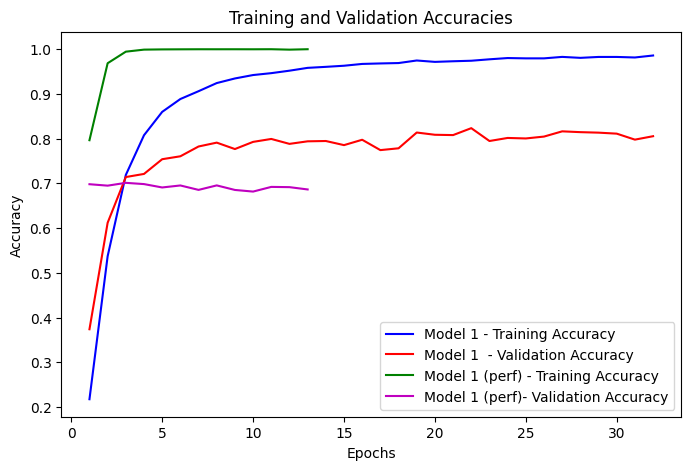

In [23]:
# load history for model 1 with learning rate scheduling
history_name1_perf = "./history1_perf"
with open(history_name1_perf, "rb") as file_pi:
    loaded_history1_perf = pickle.load(file_pi)

# Load history for the original model1 
history_name1 = "./history1"
with open(history_name1, "rb") as file_pi:
    loaded_history1 = pickle.load(file_pi)

# Plot the training and validation accuracy for both models

# Get the training and validation accuracies for model1
train_acc1 = loaded_history1['accuracy']
val_acc1 = loaded_history1['val_accuracy']

# Get the training and validation accuracies for model1_perf
train_acc1_perf = loaded_history1_perf['accuracy']
val_acc1_perf = loaded_history1_perf['val_accuracy']

epochs_model1 = range(1, len(train_acc1) + 1)
epochs_model2 = range(1, len(train_acc1_perf) + 1)
plt.figure(figsize=(8,5))
plt.plot(epochs_model1, train_acc1, 'b', label='Model 1 - Training Accuracy')
plt.plot(epochs_model1, val_acc1, 'r', label='Model 1  - Validation Accuracy')
plt.plot(epochs_model2, train_acc1_perf, 'g', label='Model 1 (perf) - Training Accuracy')
plt.plot(epochs_model2, val_acc1_perf, 'm', label='Model 1 (perf)- Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Model 4: Transfer learning using a pre-trained **MobileNetV3Small** model on imagenet dataset

In [24]:
from keras.utils import img_to_array, array_to_img

# Reshape test data to (num_samples, 28, 28, 3)
X_train_3c = np.dstack([train_images_scaled] * 3)
X_test_3c = np.dstack([test_images_scaled]*3)

# Create a 3d image. Each channel contains same data.
train_images_mb = X_train_3c.reshape((X_train_3c.shape[0], 28, 28, 3)) 
test_images_mb = X_test_3c.reshape((X_test_3c.shape[0], 28, 28, 3))

In [26]:
from tensorflow.keras.applications import MobileNetV3Small 
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Reshape

# Load the pre-trained MobileNet model with weights from ImageNet
base_mb_model = MobileNetV3Small(
    weights='imagenet',  # Load weights pre-trained on ImageNet.    
    include_top=False)  # Not include the ImageNet classifier at the top (final layer)

# Freeze the weights of the pretrained layers
base_mb_model.trainable = False

# Modify the input layer to accept inputs of shape (28, 28, 3)
input_shape = (28, 28, 3)
inputs = tf.keras.Input(shape=input_shape)

# Add layer UpSampling2D to upscale the input by a factor of 2
upsampled_inputs = UpSampling2D(size=(2, 2))(inputs)

# Pass the upscaled inputs through the base model
outputs = base_mb_model(upsampled_inputs, training=False)
reshaped_output = tf.keras.layers.GlobalAveragePooling2D()(outputs)

# Add a dense output layer with 24 units and softmax activation
output_layer = Dense(24, activation='softmax')(reshaped_output)

# Create the new model
final_mb_model = tf.keras.Model(inputs=inputs, outputs=output_layer)
final_mb_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 up_sampling2d_1 (UpSampling  (None, 56, 56, 3)        0         
 2D)                                                             
                                                                 
 MobilenetV3small (Functiona  (None, None, None, 576)  939120    
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_85 (Dense)            (None, 24)                13848     
                                                           

In [27]:
# Define an initial learning rate                            
initial_learning_rate = 0.1

# Create the proper learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Compile model
final_mb_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

history_mb = None
checkpoint_path_mb = "best_mobilenet_model.h5"

# Define model checkpoint callback
best_model_checkpoint = ModelCheckpoint(
    checkpoint_path_mb, 
    monitor='val_accuracy', 
    save_best_only=True, 
    save_weights_only=False, 
    mode='max', 
    verbose=1
)

# Set up early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True) 
## Perform the training on your machine and then comment out the following section before uploading it to gradescope. 
#################################### 
# make sure your best model is named as follow:
# MobileNet model filename = best_mobilenet_model.h5
# Train the model (comment this section out)
history_mb = final_mb_model.fit(train_images_mb, train_labels_encoded, 
                 validation_data=(test_images_mb, test_labels_encoded), 
                 epochs=100, batch_size=32,
                 callbacks=[best_model_checkpoint, early_stopping_cb])

# The following code will save your history - don't change it
if "history_mb" in globals():
    with open('./historymb', 'wb') as file_pi:
        pickle.dump(history_mb.history, file_pi)    


Epoch 1/100
858/858 [==============================] - ETA: 0s - loss: 2.2797 - accuracy: 0.2988
Epoch 1: val_accuracy improved from -inf to 0.34314, saving model to best_mobilenet_model.h5
858/858 [==============================] - 28s 27ms/step - loss: 2.2797 - accuracy: 0.2988 - val_loss: 1.9739 - val_accuracy: 0.3431
Epoch 2/100
858/858 [==============================] - ETA: 0s - loss: 1.6621 - accuracy: 0.4543
Epoch 2: val_accuracy improved from 0.34314 to 0.41341, saving model to best_mobilenet_model.h5
858/858 [==============================] - 19s 23ms/step - loss: 1.6621 - accuracy: 0.4543 - val_loss: 1.9080 - val_accuracy: 0.4134
Epoch 3/100
858/858 [==============================] - ETA: 0s - loss: 1.4388 - accuracy: 0.5265
Epoch 3: val_accuracy improved from 0.41341 to 0.50335, saving model to best_mobilenet_model.h5
858/858 [==============================] - 19s 23ms/step - loss: 1.4388 - accuracy: 0.5265 - val_loss: 1.5417 - val_accuracy: 0.5033
Epoch 4/100
858/858 [====

Epoch 28/100
857/858 [============================>.] - ETA: 0s - loss: 0.6731 - accuracy: 0.7814
Epoch 28: val_accuracy improved from 0.69102 to 0.69506, saving model to best_mobilenet_model.h5
858/858 [==============================] - 22s 25ms/step - loss: 0.6731 - accuracy: 0.7814 - val_loss: 0.9313 - val_accuracy: 0.6951
Epoch 29/100
857/858 [============================>.] - ETA: 0s - loss: 0.6619 - accuracy: 0.7863
Epoch 29: val_accuracy did not improve from 0.69506
858/858 [==============================] - 21s 24ms/step - loss: 0.6618 - accuracy: 0.7864 - val_loss: 0.9812 - val_accuracy: 0.6765
Epoch 30/100
858/858 [==============================] - ETA: 0s - loss: 0.6545 - accuracy: 0.7898
Epoch 30: val_accuracy did not improve from 0.69506
858/858 [==============================] - 21s 24ms/step - loss: 0.6545 - accuracy: 0.7898 - val_loss: 0.9929 - val_accuracy: 0.6616
Epoch 31/100
856/858 [============================>.] - ETA: 0s - loss: 0.6487 - accuracy: 0.7891
Epoch 31

In [ ]:

# define the file name for the saved model
model_name = "best_mobilenet_model.h5"
# load the model
final_mb_model = keras.models.load_model(model_name)

# Evaluate the model on the test set
test_loss1_mobilenet, test_acc1_mobilenet = final_mb_model.evaluate(test_images_mb, test_labels_encoded)
print(f"Model Mobile Net: Test accuracy: {test_acc1_mobilenet:.4f}")